<a href="https://colab.research.google.com/github/Anannyyya/python_examples/blob/master/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd
df = pd.read_csv("crop_yield_data.xls")  # Replace with the actual file name
print(df.head())  # Display the first few rows
X = df.drop('crop_yield', axis=1)
y = df['crop_yield']

   temperature  humidity  rainfall  soil_quality  fertilizer_used  crop_yield
0           25        60        50             7              200        2000
1           28        65        60             6              220        2200
2           24        58        40             8              180        1800
3           26        62        55             7              210        2100
4           22        59        45             6              190        1900


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # For regression output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4506740.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4506598.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4506458.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4506322.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4506185.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4506050.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4505920.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 4505793.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4505666.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4505539.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4505414.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4505287.5000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4505160.5000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4505032.5000
Epo

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 5240703.0000
Test Loss: 5240703.0


LAB 2

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load Dataset
data = pd.read_csv("climate_data.csv")

In [3]:
# Select features (X) and target variable (y)
X = data.drop(columns=["Energy Consumption"])
y = data["Energy Consumption"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 5. Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 6. Build the FNN Model
# a. Initialize the model
model = Sequential()

# b. Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# c. Hidden layers
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# d. Output layer (for regression tasks)
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# e. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 7. Train the Model

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use part of the training set for validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3071366.5000 - mae: 1530.9136 - val_loss: 3081552.2500 - val_mae: 1536.6166
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3047552.5000 - mae: 1521.4167 - val_loss: 2956643.5000 - val_mae: 1502.8514
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2953054.7500 - mae: 1498.0984 - val_loss: 2648577.2500 - val_mae: 1418.3053
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2524734.0000 - mae: 1373.6547 - val_loss: 2141924.5000 - val_mae: 1270.1501
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2014604.6250 - mae: 1230.8979 - val_loss: 1516223.0000 - val_mae: 1064.3335
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1370604.8750 - mae: 1011.7505 - val_loss: 902886.3750 - val_mae: 819.9135
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 758522.0000 - mae: 748.1473 - val_loss: 433017.9688 - val_mae: 570.8558
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [8]:
# 8. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1654.5411 - mae: 28.1117
Test Loss: 1669.22900390625, Test MAE: 28.101036071777344


In [9]:
# 9. Make Predictions
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [10]:
# 10. Display the first few predictions
print("Predictions:", predictions[:5])
print("Actual Values:", y_test[:5].values)

Predictions: [[1161.4293 ]
 [2324.2375 ]
 [ 309.61502]
 [1735.8944 ]
 [2075.8782 ]]
Actual Values: [1148.70560487 2328.94848405  213.59189032 1719.90776768 2114.25192812]


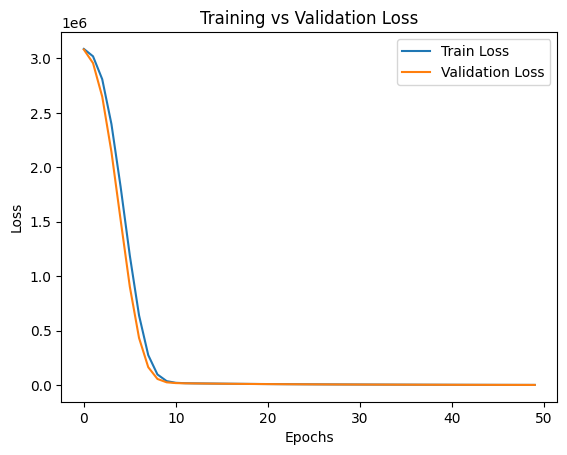

In [11]:
# 11. Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [14]:
%config Completer.use_jedi = True

predict energy consumption

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Load Dataset
data = pd.read_csv("/content/predict_energy_consumption.csv")

In [18]:
# Select features (X) and target variable (y)
X = data.drop(columns=["energy_consumption"])
y = data["energy_consumption"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 5. Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# 6. Build the FNN Model
# a. Initialize the model
model = Sequential()

# b. Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# c. Hidden layers
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# d. Output layer (for regression tasks)
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# e. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 7. Train the Model

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use part of the training set for validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 90880.6172 - mae: 271.7396 - val_loss: 83596.3516 - val_mae: 258.8129
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90101.6328 - mae: 272.5029 - val_loss: 83243.0703 - val_mae: 258.1282
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91921.0625 - mae: 273.4081 - val_loss: 82840.1094 - val_mae: 257.3438
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89511.3750 - mae: 270.0531 - val_loss: 82381.0156 - val_mae: 256.4465
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89026.8594 - mae: 269.3345 - val_loss: 81832.8281 - val_mae: 255.3719
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86763.8203 - mae: 264.3901 - val_loss: 81198.0781 - val_mae: 254.1217
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87651.6250 - mae: 268.8996 - val_loss: 80453.0312 - val_mae: 252.6427
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87253.2891 - mae: 265.7004 - val_loss: 79592.9

In [23]:
# 8. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18563.4258 - mae: 117.0499 
Test Loss: 18531.330078125, Test MAE: 116.96696472167969


In [24]:
# 9. Make Predictions
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [25]:
# 10. Display the first few predictions
print("Predictions:", predictions[:5])
print("Actual Values:", y_test[:5].values)

Predictions: [[276.65024]
 [244.95468]
 [245.86795]
 [199.25337]
 [301.30203]]
Actual Values: [309.70268707 206.97435836 373.42315097 280.00113732  51.88434963]


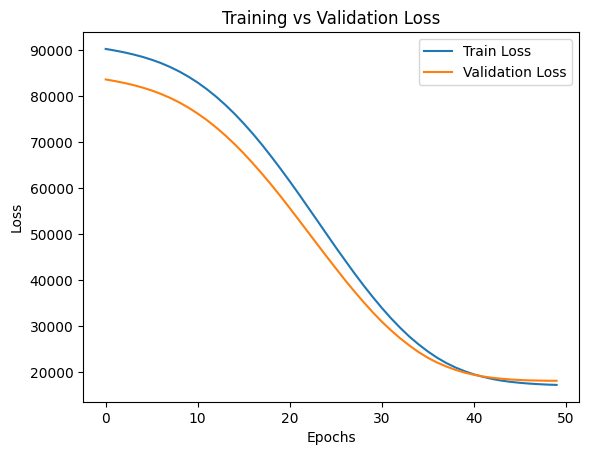

In [26]:
# 11. Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()